# Project Sales Analysis

In [1]:
#Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Step 2: Read the CSV from Part I
Time to read the CSV that you obtained from Part I. Here are the things you need to do:
1. Parse dates as True
2. Make the InvoiceDate column as the index of the DataFrame

As a reminder, this is what you should see:
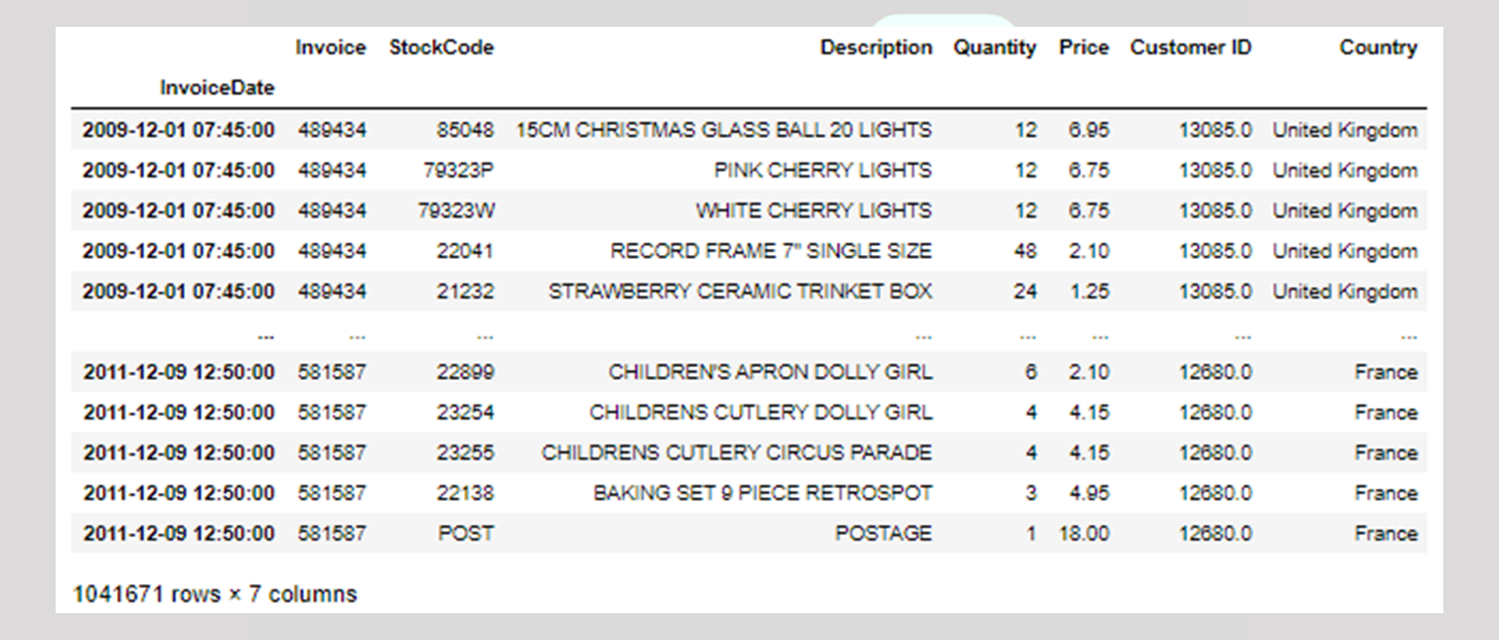

In [2]:
#Read your CSV from Part I
retail = pd.read_csv('./datasets/cleaned_data.csv', index_col=['invoicedate'], parse_dates=True)

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
retail.index

DatetimeIndex(['2009-12-01 07:45:00', '2009-12-01 07:45:00',
               '2009-12-01 07:45:00', '2009-12-01 07:45:00',
               '2009-12-01 07:45:00', '2009-12-01 07:45:00',
               '2009-12-01 07:45:00', '2009-12-01 07:45:00',
               '2009-12-01 07:46:00', '2009-12-01 07:46:00',
               ...
               '2011-12-09 12:50:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00'],
              dtype='datetime64[ns]', name='invoicedate', length=1041671, freq=None)

In [4]:
retail.head()

,invoice,stockcode,description,quantity,price,customer_id,country
invoicedate,,,,,,,
2009-12-01 07:45:00,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom
2009-12-01 07:45:00,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom
2009-12-01 07:45:00,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom
2009-12-01 07:45:00,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom
2009-12-01 07:45:00,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom


## Univariate analysis (UA)

In [5]:
#Create a new column named "Revenue"
retail['revenue'] = retail['price'] * retail['quantity']
retail.head()

,invoice,stockcode,description,quantity,price,customer_id,country,revenue
invoicedate,,,,,,,,
2009-12-01 07:45:00,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,83.4
2009-12-01 07:45:00,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.0
2009-12-01 07:45:00,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.0
2009-12-01 07:45:00,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,100.8
2009-12-01 07:45:00,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,30.0


### Distribution of Quantity
We plot a violinplot to see the distribution of Quantity. 

In [6]:
round(retail['quantity'].describe(),3)

count    1041671.000
mean          10.963
std          126.515
min            1.000
25%            1.000
50%            3.000
75%           10.000
max        80995.000
Name: quantity, dtype: float64

Text(0.5, 1.0, 'Histogram of Quantity')

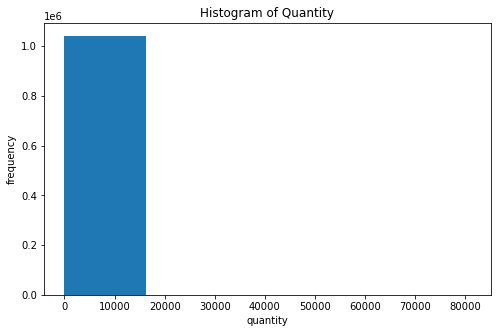

In [7]:
#Plot violinplot using 'Quantity'
plt.figure(figsize=(8,5))
plt.hist(retail['quantity'], bins=5)
plt.xlabel('quantity')
plt.ylabel('frequency')
plt.title('Histogram of Quantity')

#### Log-transformed 'Quantity'
Since there's a right-skewed distribution, we shall transform the values by log to see if it becomes a normal distribution.

In [8]:
round(np.log(retail['quantity']).describe(),3)

count    1041671.000
mean           1.378
std            1.224
min            0.000
25%            0.000
50%            1.099
75%            2.303
max           11.302
Name: quantity, dtype: float64

Text(0.5, 1.0, 'Histogram of log-transformed Quantity')

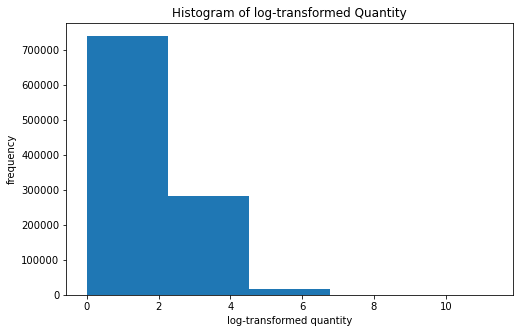

In [9]:
#Plot the log transformed version of Quantity
plt.figure(figsize=(8,5))
plt.hist(np.log(retail['quantity']), bins=5)
plt.xlabel('log-transformed quantity')
plt.ylabel('frequency')
plt.title('Histogram of log-transformed Quantity')

### Distribution of Price

Text(0.5, 1.0, 'Histogram of Price')

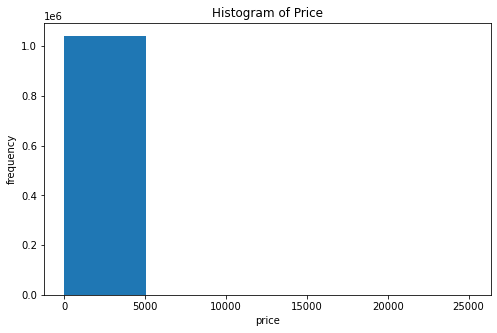

In [10]:
#Plot a histogram using 'Price'
plt.figure(figsize=(8,5))
plt.hist(retail['price'], bins=5)
plt.xlabel('price')
plt.ylabel('frequency')
plt.title('Histogram of Price')

#### Log-transformed 'Price'
Similarly, the skew is strong so let's see if a log transformation can help.

In [11]:
round(np.log(retail['price']).describe(),3)

count    1041671.000
mean           0.794
std            0.942
min           -6.908
25%            0.223
50%            0.742
75%            1.418
max           10.131
Name: price, dtype: float64

Text(0.5, 1.0, 'Histogram of log-transformed Price')

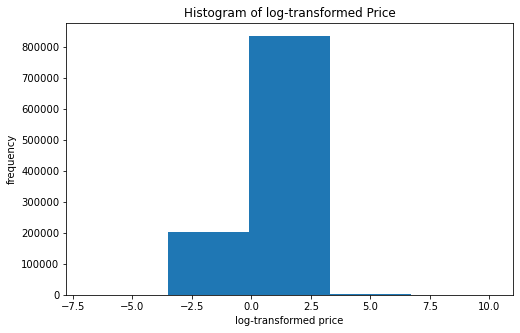

In [12]:
#Plot log-transformed Price with a histogram
plt.figure(figsize=(8,5))
plt.hist(np.log(retail['price']), bins=5)
plt.xlabel('log-transformed price')
plt.ylabel('frequency')
plt.title('Histogram of log-transformed Price')

### Distribution of Revenue

Text(0.5, 1.0, 'Histogram of Revenue')

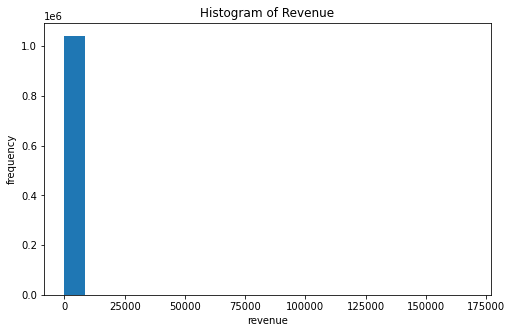

In [13]:
#Plot a histogram using Revenue
plt.figure(figsize=(8,5))
plt.hist(retail['revenue'], bins=20)
plt.xlabel('revenue')
plt.ylabel('frequency')
plt.title('Histogram of Revenue')

#### Log-transformed 'Revenue'

Text(0.5, 1.0, 'Histogram of log-transformed Revenue')

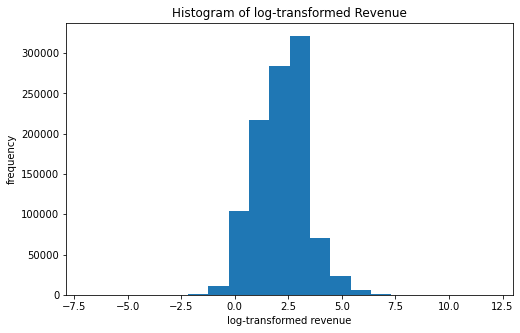

In [14]:
#Plot the log-transformed Revenue with a histogram
plt.figure(figsize=(8,5))
plt.hist(np.log(retail['revenue']), bins=20)
plt.xlabel('log-transformed revenue')
plt.ylabel('frequency')
plt.title('Histogram of log-transformed Revenue')

None of the three quantities (price, quantity, revenue) looked normally distributed after the log transformation.

### Quantity over time
Let's look at quantity purchased by all customers over time.

Text(0.5, 1.0, 'Plot of Quantity over time')

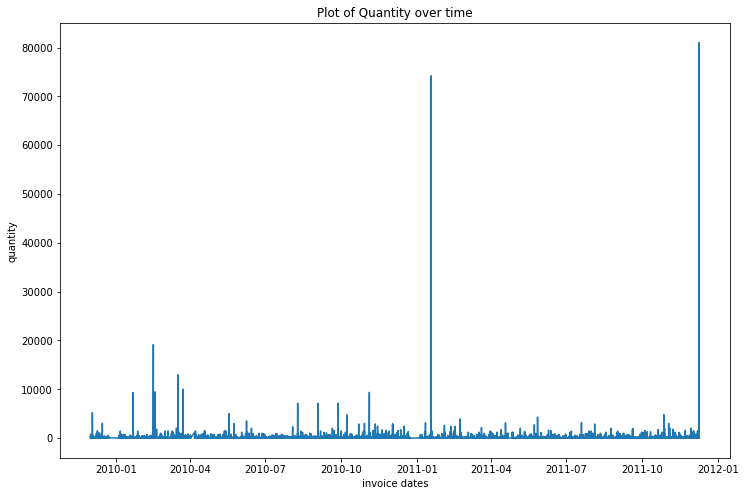

In [15]:
#Plot 'Quantity' over time with a .plot
plt.figure(figsize=(12,8))
plt.plot(retail['quantity'])
plt.xlabel('invoice dates')
plt.ylabel('quantity')
plt.title('Plot of Quantity over time')

### Countries

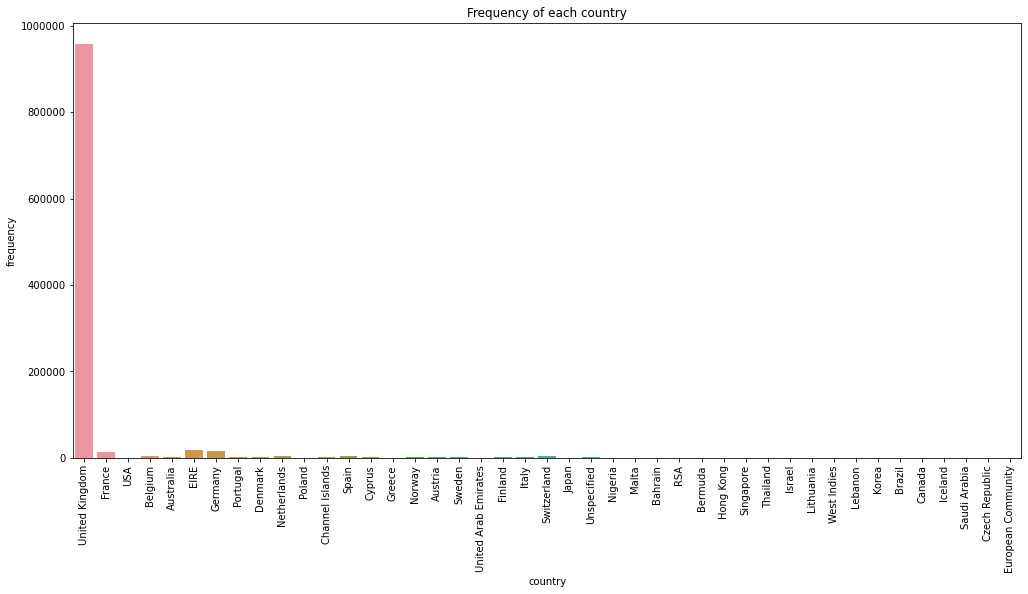

In [25]:
plt.figure(figsize=(17,8))
sns.countplot(retail['country'])
plt.xlabel('country')
plt.ylabel('frequency')
plt.title('Frequency of each country')
plt.xticks(rotation='90')
plt.ticklabel_format(style='plain', axis='y')

## Bivariate analysis (BA)

### Quantity against Price 

Text(0.5, 1.0, 'Quantity against Price')

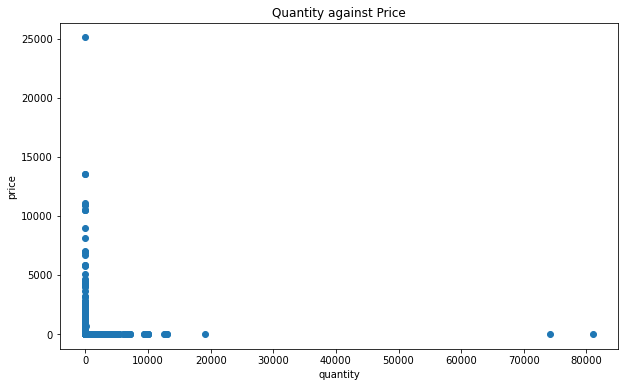

In [16]:
#Plot 'Quantity' against 'Price' with a scatter plot
plt.figure(figsize=(10,6))
plt.scatter(retail['quantity'], retail['price'])
plt.xlabel('quantity')
plt.ylabel('price')
plt.title('Quantity against Price')

#### Log-transformed Quantity and Log-transformed Price

Text(0.5, 1.0, 'log-transformed Quantity against log-transformed Price')

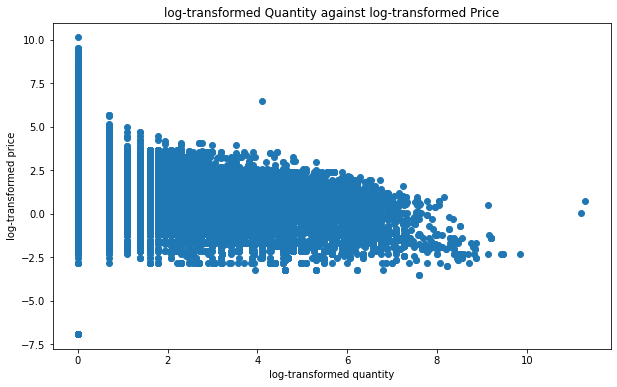

In [17]:
#Plot log-transformed Quantity against log-transformed Price
plt.figure(figsize=(10,6))
plt.scatter(np.log(retail['quantity']), np.log(retail['price']))
plt.xlabel('log-transformed quantity')
plt.ylabel('log-transformed price')
plt.title('log-transformed Quantity against log-transformed Price')

### Export new DataFrame

In [18]:
#Export the DataFrame with 'Revenue' as a CSV
retail.to_csv('./datasets/cleaned_data_with_revenue.csv')